In [73]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA
import numpy as np

from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


from sklearn import metrics
from  sklearn.model_selection import train_test_split


from time import time

In [75]:
data1= pd.read_csv('kNN.csv')


In [76]:
print(data1.shape)
print(data1.size)

(569, 33)
18777


Réduction du nombre de colonnes par l'élimination de celles dont la correlation avec la colonne "diagnosis" est < "0.35"
1. Eliminer 'id',"Unnamed: 32", en premier.
2. Encodage de M et B par "0" et "1"

In [77]:
#la colonne Unnamed est completement vide, nous allons 
# l'enlever du data set
data1 = data1.drop(['id',"Unnamed: 32"], axis=1)

data1['diagnosis']= data1['diagnosis'].astype('category').cat.codes
print("Encodage de M et B par ", data['diagnosis'].unique())

Encodage de M et B par  [1 0]


In [78]:
#la matrice de correlation 
matrice_corr = data.corr(method='spearman').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'))
matrice_corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
diagnosis,1.0,0.733,0.462,0.748,0.734,0.372,0.609,0.733,0.778,0.617,0.714,0.381,0.47,0.489,0.788,0.477,0.796,0.787,0.426,0.607,0.706,0.782,0.397
radius_mean,0.733,1.0,0.341,0.998,1.0,0.149,0.498,0.646,0.76,0.55,0.738,0.265,0.365,0.411,0.979,0.315,0.972,0.979,0.126,0.491,0.596,0.727,0.175
texture_mean,0.462,0.341,1.0,0.348,0.344,0.0246,0.266,0.343,0.307,0.364,0.395,0.264,0.287,0.239,0.367,0.909,0.375,0.368,0.101,0.291,0.34,0.319,0.121
perimeter_mean,0.748,0.998,0.348,1.0,0.997,0.183,0.544,0.682,0.789,0.56,0.746,0.309,0.402,0.442,0.981,0.323,0.979,0.981,0.157,0.535,0.632,0.758,0.199
area_mean,0.734,1.0,0.344,0.997,1.0,0.138,0.489,0.643,0.755,0.553,0.742,0.26,0.362,0.406,0.979,0.318,0.972,0.98,0.12,0.486,0.594,0.723,0.171
smoothness_mean,0.372,0.149,0.0246,0.183,0.138,1.0,0.679,0.519,0.565,0.334,0.296,0.392,0.355,0.439,0.203,0.0606,0.226,0.192,0.796,0.481,0.429,0.499,0.394
compactness_mean,0.609,0.498,0.266,0.544,0.489,0.679,1.0,0.897,0.848,0.507,0.54,0.818,0.772,0.732,0.543,0.255,0.592,0.532,0.579,0.901,0.838,0.825,0.45
concavity_mean,0.733,0.646,0.343,0.682,0.643,0.519,0.897,1.0,0.927,0.575,0.644,0.761,0.858,0.775,0.682,0.336,0.722,0.677,0.489,0.85,0.939,0.905,0.384
concave points_mean,0.778,0.76,0.307,0.789,0.755,0.565,0.848,0.927,1.0,0.635,0.727,0.608,0.675,0.758,0.787,0.301,0.814,0.78,0.49,0.758,0.827,0.937,0.355
radius_se,0.617,0.55,0.364,0.56,0.553,0.334,0.507,0.575,0.635,1.0,0.953,0.428,0.453,0.596,0.598,0.284,0.593,0.596,0.204,0.34,0.404,0.509,0.147


In [257]:
#Suppression des features qui possèdent une correlation
# infeieur à 0.35 avec la target diaganostic.
data = data1.drop(["symmetry_mean","fractal_dimension_mean","texture_se","perimeter_se","smoothness_se","symmetry_se","fractal_dimension_se","fractal_dimension_worst"], axis=1)



In [80]:
print(data.shape)
print(data.size)

(569, 23)
13087


In [81]:
# définition des labels 'y' et X les features
y = data['diagnosis'] 

X = data.drop(["diagnosis"], axis=1)

# We define  X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size =0.25, random_state=42)


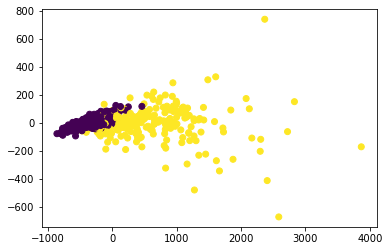

In [82]:
import numpy as np
#  Réduction de dimension à 2 dimensions utilisation de la PCA seule
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
data_reduit = pca_model.fit_transform(X)
plt.scatter(data_reduit[:,0],data_reduit[:,1], c=y)


/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[2 3 4 5 6 7 8 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


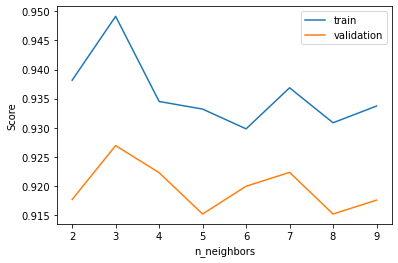

In [83]:
from sklearn.model_selection import validation_curve
model = KNeighborsClassifier()
k = np.arange(2,10)
train_score , val_score = validation_curve(model,X_train,Y_train,'n_neighbors',k, cv = 10, scoring='accuracy')
TSM = train_score.mean(axis=1)

#print(TSM,3)
plt.plot(k,train_score.mean(axis=1),label = "train")
plt.plot(k,val_score.mean(axis=1),label = "validation")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.legend()

In [84]:
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [256]:
# Utilisation de pipeline pour tester différentes combinaison
from sklearn.pipeline import Pipeline
pipe1 = Pipeline([
    ('SS', StandardScaler()),
    ('kNeig_3', KNeighborsClassifier(n_neighbors=3))
    ])

pipe2 = Pipeline([
    ('SS', StandardScaler()),
    ('kNeig_7', KNeighborsClassifier(n_neighbors=7))
    ])

pipe3 = Pipeline([
   # ('PCA2', PCA(n_components=2)),
    ('kNeig_3', KNeighborsClassifier(n_neighbors=3))
    ])

pipe4 = Pipeline([
    ('SS', StandardScaler()),
    ('PCA4', PCA(n_components=4)),
    ('kNeig_7', KNeighborsClassifier(n_neighbors=7))
    ])

pipe5 = Pipeline([
    ('kNeig_7', KNeighborsClassifier(n_neighbors=7))
    ])
pipe6 = Pipeline([
    ('SVC', LinearSVC(max_iter=500))
    ])
pipe7 = Pipeline([
    ('SS', StandardScaler()),
    ('SVC', LinearSVC(max_iter=500))
    ])
pipe8 = Pipeline([
    ('SS', StandardScaler()),
    ('PCA4', PCA(n_components=4)),
    ('SVC', LinearSVC(max_iter=500))
    ])
                 
# liste time ,  f1_score, pipeline

t = []
f1Score = []
ScoreTR = []
ScoreTS= []
P = []
R = []

pipes = [pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7,pipe8]

for pipe in pipes:
    
    # Learn
    start = time()
    pipe.fit(X_train, Y_train)
    t1 = time() - start
    
    # predict and save results evaluation
    y_pred = pipe.predict(X_test)
    
      
    f1 = f1_score(Y_test, y_pred, average='weighted')
    S = round(pipe.score(X_train,Y_train),3)
    ST = round(pipe.score(X_test,Y_test),3)
    p1 = round(metrics.precision_score(Y_test, y_pred),4)
    r1 = round(metrics.recall_score(Y_test, y_pred),4)
    
    # save time and score
    t.append(round(t1,3))
    f1Score.append(round(f1,3))
    ScoreTR.append(round(S,3))
    ScoreTS.append(round(ST,3))
    P.append(round(p1,3))
    R.append(round(r1,3))
    
time_f = time()- start
names = ["SS+kNeig_3", "SS+KNeig_7", "kNeig_3", "SS+PCA4+kNeig_7","kNeig_7","SVC","SS+SVC","SS+PCA4+SVC"]  
# mettre les résultats ds un tableau

print("temps total :", round(time_f,3))

#mettre les résultats d'un dictionnaire et le convertir ds un dataframe
dict_result = {}
dict_result ['Pipe'] = names
dict_result ['Time'] = t
dict_result ['f1_score'] = f1Score
dict_result ['Train Score'] = ScoreTR
dict_result ['Test Score'] = ScoreTS
dict_result ['Precision'] = P
dict_result ['Recall'] = R

df = pd.DataFrame.from_dict(dict_result)
#df.to_csv('result1.csv')
#df1 = pd.read_csv('result1.csv')
df

temps total : 0.019


/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Pipe,Time,f1_score,Train Score,Test Score,Precision,Recall
0,SS+kNeig_3,0.009,0.965,0.986,0.965,0.946,0.963
1,SS+KNeig_7,0.005,0.972,0.977,0.972,0.963,0.963
2,kNeig_3,0.003,0.930,0.951,0.930,0.907,0.907
3,SS+PCA4+kNeig_7,0.005,0.965,0.965,0.965,0.962,0.944
4,kNeig_7,0.003,0.958,0.937,0.958,0.962,0.926
5,SVC,0.017,0.979,0.913,0.979,0.964,0.982
6,SS+SVC,0.008,0.972,0.991,0.972,0.946,0.982
7,SS+PCA4+SVC,0.008,0.972,0.974,0.972,0.963,0.963


#### Quelques éléments d'analyse :
DAns le cas d'une data set réduit de 23 variables au lieu des 32 initiales
1. la réduction de dimension en éliminant les variables dont la correlation  est inféerieure à 0.35 améliore les résulats.
1. La standadisation améliore les résultats
2. le recours à la PCA dans ce cas de figure n'apporte aucune amélioration
3. la SVC donne des résultats meilleurs que le KNN